In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        # save_to_dir="AugmentedImages"  # Ise uncomment kar dein
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.57776    0.55815214 0.5856031 ]
  [0.5764706  0.5568628  0.58431375]
  [0.57384336 0.5542355  0.5816865 ]
  ...
  [0.37411353 0.35450566 0.38195667]
  [0.37397343 0.3543656  0.38181657]
  [0.37383336 0.35422552 0.3816765 ]]

 [[0.57790005 0.5582922  0.5857432 ]
  [0.5764706  0.5568628  0.58431375]
  [0.57398343 0.5543756  0.58182657]
  ...
  [0.37490362 0.35529578 0.38274676]
  [0.3750437  0.35543585 0.38288686]
  [0.37518382 0.35557598 0.38302696]]

 [[0.5780401  0.5584323  0.58588326]
  [0.5764706  0.5568628  0.58431375]
  [0.57412356 0.5545157  0.5819667 ]
  ...
  [0.37647063 0.35686275 0.38431376]
  [0.37647063 0.35686275 0.38431376]
  [0.37647063 0.35686275 0.38431376]]

 ...

 [[0.61485505 0.60309035 0.6462276 ]
  [0.61373425 0.60196954 0.6451068 ]
  [0.61261356 0.60084885 0.6439861 ]
  ...
  [0.5035883  0.48398045 0.51143146]
  [0.49502653 0.4754187  0.5028697 ]
  [0.51901424 0.49940637 0.5268574 ]]

 [[0.5929345  0.5811698  0.62430704]
  [0.5926543  0.5808896  0.62402683]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6151773  0.6112557  0.6740008 ]
  [0.60707873 0.60315716 0.66590226]
  [0.6186776  0.61475605 0.67750114]
  ...
  [0.4901961  0.48235297 0.53333336]
  [0.48907194 0.4812288  0.53220916]
  [0.4877597  0.47991657 0.5308969 ]]

 [[0.6178017  0.61388016 0.67662525]
  [0.60511035 0.6011888  0.6639339 ]
  [0.61670923 0.61278766 0.67553276]
  ...
  [0.4826516  0.47480845 0.52578884]
  [0.48843473 0.4805916  0.531572  ]
  [0.49630815 0.488465   0.5394454 ]]

 [[0.6165391  0.61261755 0.67536265]
  [0.60496104 0.60103947 0.66378456]
  [0.6147409  0.61081934 0.67356443]
  ...
  [0.5269568  0.51911366 0.57009405]
  [0.5366364  0.5287933  0.57977366]
  [0.5471343  0.53929114 0.59027153]]

 ...

 [[0.7852592  0.7852592  0.832318  ]
  [0.7872276  0.7872276  0.8342864 ]
  [0.7891959  0.7891959  0.8362547 ]
  ...
  [0.6462084  0.63836527 0.6932672 ]
  [0.55016285 0.5423197  0.5972217 ]
  [0.5157262  0.5078831  0.562785  ]]

 [[0.7945193  0.7945193  0.8415781 ]
  [0.7905826  0.7905826  0.8376414 ]


Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

Compiling the Model

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 96s 2s/step - loss: 0.9174 - accuracy: 0.4919 - val_loss: 0.8697 - val_accuracy: 0.4740
Epoch 2/20
47/47 [==============================] - 42s 883ms/step - loss: 0.7566 - accuracy: 0.6065 - val_loss: 0.6476 - val_accuracy: 0.6979
Epoch 3/20
47/47 [==============================] - 43s 923ms/step - loss: 0.5066 - accuracy: 0.7734 - val_loss: 0.5611 - val_accuracy: 0.6875
Epoch 4/20
47/47 [==============================] - 40s 848ms/step - loss: 0.4632 - accuracy: 0.7924 - val_loss: 0.5108 - val_accuracy: 0.7812
Epoch 5/20
47/47 [==============================] - 42s 891ms/step - loss: 0.3615 - accuracy: 0.8589 - val_loss: 0.5085 - val_accuracy: 0.7917
Epoch 6/20
47/47 [==============================] - 72s 2s/step - loss: 0.2917 - accuracy: 0.8792 - val_loss: 0.2774 - val_accuracy: 0.8646
Epoch 7/20
47/47 [==============================] - 30s 644ms/step - loss: 0.1719 - accuracy: 0.9328 - val_loss: 0.1499 - val_accuracy: 0.9271
Epoch

In [16]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 13s 941ms/step - loss: 0.1220 - accuracy: 0.9490


In [17]:
scores

[0.12198778986930847, 0.9489558935165405]

Plotting the Accuracy and Loss Curves

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9173864126205444,
 0.7566396594047546,
 0.5065730214118958,
 0.46315646171569824,
 0.36154961585998535]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.4739583432674408,
 0.6979166865348816,
 0.6875,
 0.78125,
 0.7916666865348816,
 0.8645833134651184,
 0.9270833134651184,
 0.859375,
 0.8854166865348816,
 0.9270833134651184,
 0.8802083134651184,
 0.9427083134651184,
 0.9479166865348816,
 0.9114583134651184,
 0.9479166865348816,
 0.9583333134651184,
 0.953125,
 0.9739583134651184,
 0.9635416865348816,
 0.9635416865348816]

In [26]:
acc

[0.49185889959335327,
 0.6065129041671753,
 0.7734056711196899,
 0.7924016118049622,
 0.8588873744010925,
 0.8792401552200317,
 0.9328358173370361,
 0.8317503333091736,
 0.9023066759109497,
 0.9240162968635559,
 0.9328358173370361,
 0.9246947169303894,
 0.9457259178161621,
 0.9470827579498291,
 0.9545454382896423,
 0.9559022784233093,
 0.9572591781616211,
 0.9654002785682678,
 0.9599728584289551,
 0.9579375982284546]

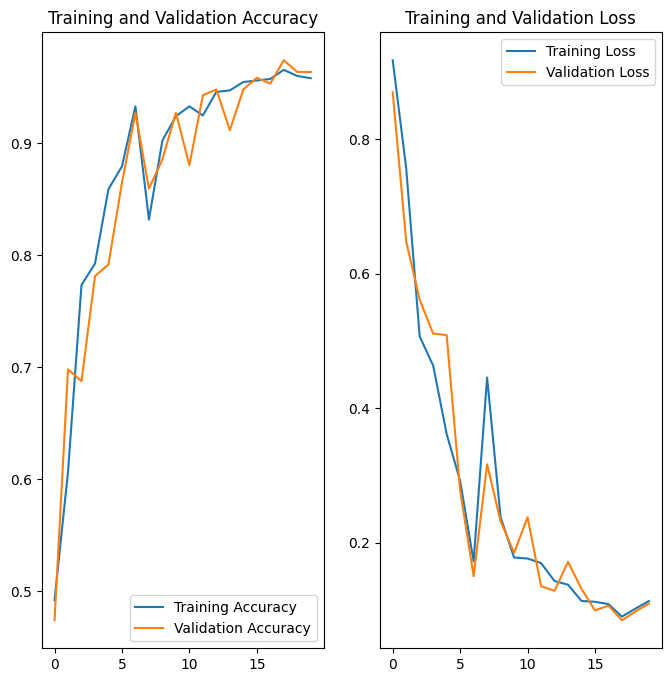

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


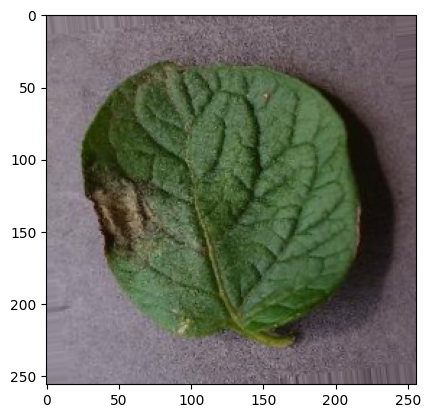

In [30]:
import numpy as np

# class_names ko yahan dobara define kar dete hain safety ke liye
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# loop for prediction
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    # yahan 'label_batch' use kiya hai bina 's' ke
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    # yahan 'image_batch' use kiya hai
    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

In [31]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

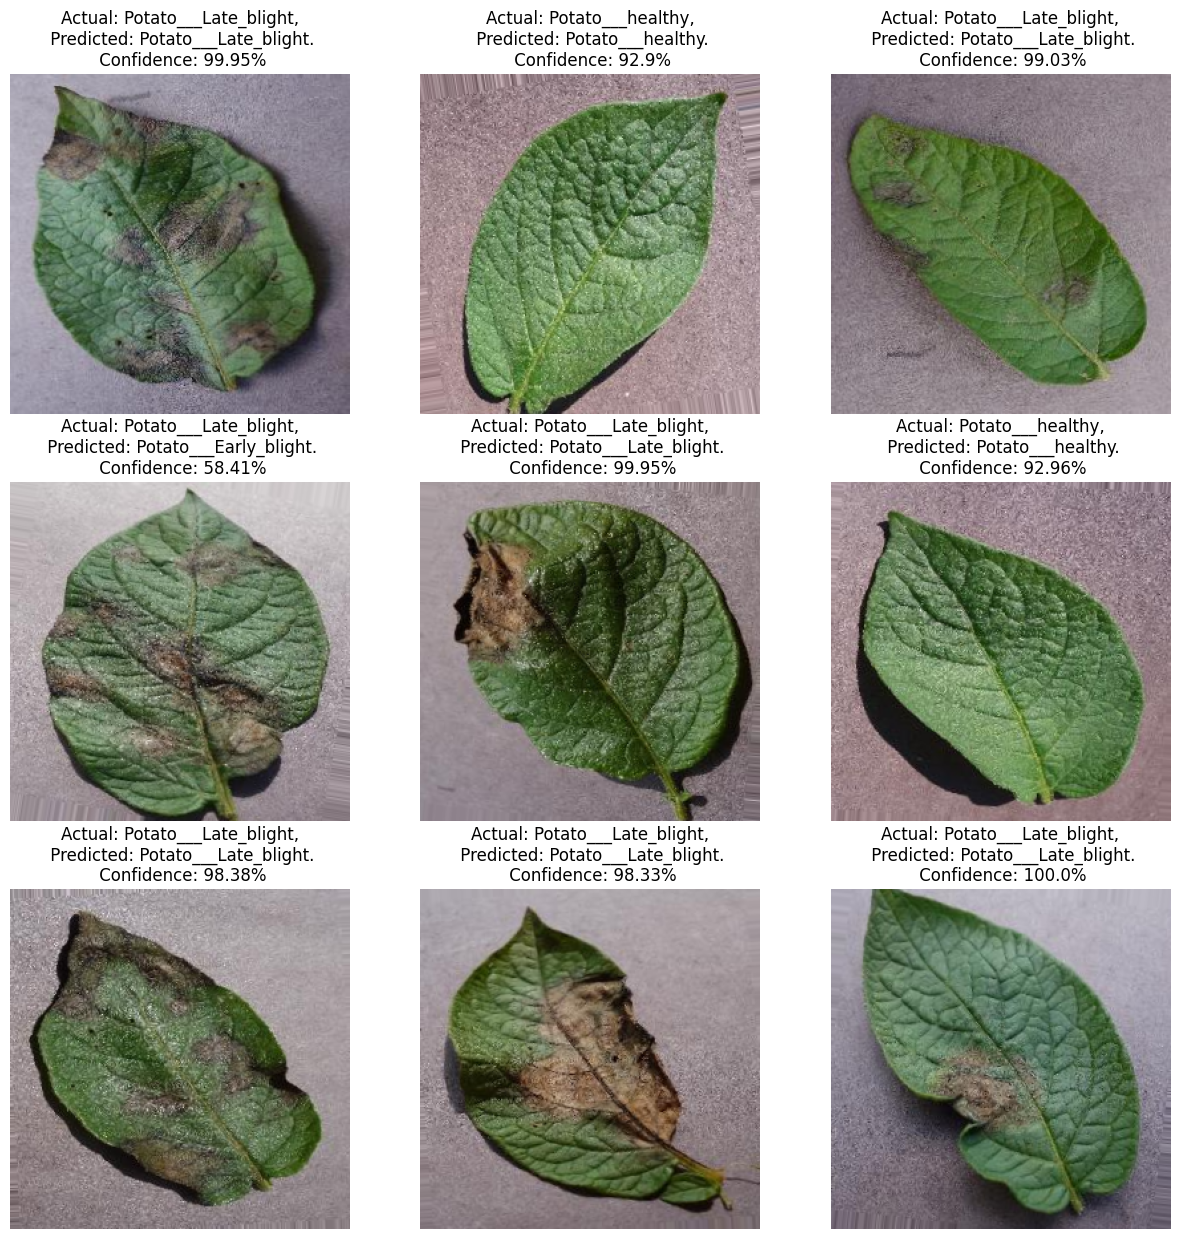

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Saving the Model

In [33]:
model.save("../potatoes.h5")